# F1 Race Predictions
### APC's Kaggle Project by Juan Carlos Soriano Valle (1493037)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from wordcloud import WordCloud
import descartes
import datetime
from scipy.stats import uniform
import operator
import geopandas as gpd
from shapely.geometry import Point, Polygon
from dateutil.relativedelta import *
import squarify

In [2]:
path = "./data/"
driversPath = "drivers"
constructorsPath = "constructors"
racesPath = "races"
resultsPath = "results"
seasonsPath = "seasons"
circuitsPath = "circuits"
qualifyingPath = "qualifying"
driverStandingsPath = "driver_standings"
constructorStandingsPath = "constructor_standings"
constructorResultsPath = "constructor_results"
statusPath = "status"
lapTimesPath = "lap_times"

### Status

In [3]:
statusDF = pd.read_csv(path+statusPath+".csv")

print(statusDF.shape)
print("Total status:", statusDF.shape[0])
pd.set_option("display.max_columns", None)
display(statusDF.head(10))

(137, 2)
Total status: 137


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
5,6,Gearbox
6,7,Transmission
7,8,Clutch
8,9,Hydraulics
9,10,Electrical


### Drivers

In [4]:
driversDF = pd.read_csv(path+driversPath+".csv")

print(driversDF.shape)
print("Total drivers:", driversDF.shape[0])
pd.set_option("display.max_columns", None)
driversDF.head(10)


(848, 9)
Total drivers: 848


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,\N,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,\N,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
9,10,glock,\N,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock


In [5]:
print("missing values:\n",driversDF.isna().sum())

missing values:
 driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            1
dtype: int64


In [6]:
print(driversDF.number.str.count("N").sum())
print(driversDF.number.count())

803
848


### Constructors

In [7]:
constructorsDF = pd.read_csv(path+constructorsPath+".csv")

print(constructorsDF.shape)
print("Total Constructors:", constructorsDF.shape[0])
pd.set_option("display.max_columns", None)
constructorsDF.head(10)

(211, 5)
Total Constructors: 211


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Forc...


In [8]:
print("missing values:\n",constructorsDF.isna().sum())

missing values:
 constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64


### Races

In [9]:
racesDF = pd.read_csv(path+racesPath+".csv")

print(racesDF.shape)
print("Total Races:", racesDF.shape[0])
pd.set_option("display.max_columns", None)
racesDF.head(10)

(1035, 8)
Total Races: 1035


,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
5,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...
6,7,2009,7,5,Turkish Grand Prix,2009-06-07,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Gran...
7,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...
8,9,2009,9,20,German Grand Prix,2009-07-12,12:00:00,http://en.wikipedia.org/wiki/2009_German_Grand...
9,10,2009,10,11,Hungarian Grand Prix,2009-07-26,12:00:00,http://en.wikipedia.org/wiki/2009_Hungarian_Gr...


In [10]:
print("missing values:\n",racesDF.isna().sum())

missing values:
 raceId       0
year         0
round        0
circuitId    0
name         0
date         0
time         0
url          0
dtype: int64


In [11]:
rounds = []
for season in np.array(racesDF.year.unique()):
    rounds.append([season, list(racesDF[racesDF.year == season]["round"])])
rounds.sort()

countRounds = racesDF.groupby('year').round.max().reset_index()['round'].tolist()
yearRounds = racesDF.groupby('year').round.max().reset_index()['year'].tolist()

c:\users\thela\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


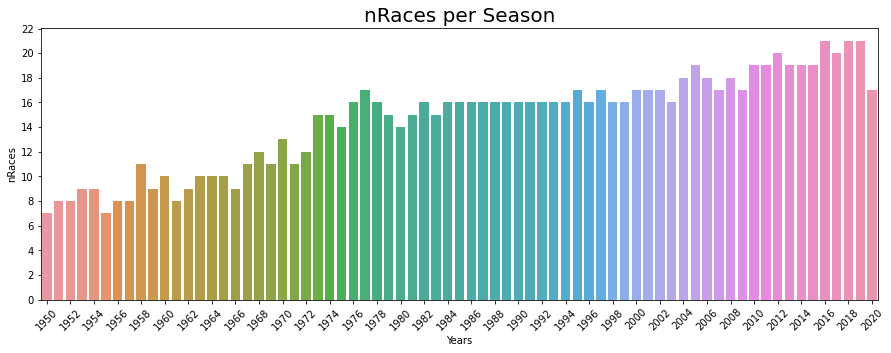

In [12]:
"""fig = plt.figure(figsize=(12,5))
plt.title("nRaces per Season")
ax = fig.add_axes([0,0,1,1])
ax.bar(yearRounds,countRounds)
plt.show()"""

fig_dims=(15,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(yearRounds,countRounds)
plt.xlabel("Years")
plt.ylabel("nRaces")
plt.title("nRaces per Season", fontsize=20)
ax.set_yticks(range(23))

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2!=0:
        xticks[i].set_visible(False)

yticks=ax.yaxis.get_major_ticks()
for i in range(len(yticks)):
    if i%2!=0:
        yticks[i].set_visible(False)

ax.set_xticklabels(yearRounds,rotation=45);


### Results

In [13]:
resultsDF = pd.read_csv(path+resultsPath+".csv")

print(resultsDF.shape)
print("Total Races:", resultsDF.shape[0])
pd.set_option("display.max_columns", None)
resultsDF.head(22)

years = []
rounds = []
circuits = []
times = []
for ids in resultsDF.raceId:
    years.append(racesDF.loc[racesDF["raceId"]==ids, "year"].iloc[0])
    rounds.append(racesDF.loc[racesDF["raceId"]==ids, "round"].iloc[0])
    circuits.append(racesDF.loc[racesDF["raceId"]==ids, "circuitId"].iloc[0])
    
for lapTimes in resultsDF.fastestLapTime:
    x = lapTimes.split(".")
    try:
        dt_obj = time.strptime(lapTimes, "%M:%S.%f")
        millitime = datetime.timedelta(hours=dt_obj.tm_hour,minutes=dt_obj.tm_min,seconds=dt_obj.tm_sec,milliseconds=int(x[1])).total_seconds()*1000
        times.append(millitime)
    except:
        times.append(300000)
resultsDF["year"] = years
resultsDF["round"] = rounds
resultsDF["circuitId"] = circuits
resultsDF["fastestLapMill"] = times
display(resultsDF.head(22))
display(resultsDF.tail())

(24900, 18)
Total Races: 24900


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,fastestLapMill
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,87452.0
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,2008,1,1,87739.0
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,2008,1,1,88090.0
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,2008,1,1,88603.0
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,2008,1,1,87418.0
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11,2008,1,1,89639.0
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,1:29.534,213.224,5,2008,1,1,89534.0
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5,2008,1,1,87903.0
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4,2008,1,1,88753.0
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3,2008,1,1,89558.0


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,fastestLapMill
24895,24901,1044,847,3,63,0,16,16,16,0.0,57,\N,\N,51,14,1:40.814,190.616,11,2020,14,5,100814.0
24896,24902,1044,825,210,20,13,17,17,17,0.0,55,\N,\N,45,15,1:40.948,190.363,54,2020,14,5,100948.0
24897,24903,1044,154,210,8,17,\N,R,18,0.0,49,\N,\N,38,18,1:43.281,186.063,130,2020,14,5,103281.0
24898,24904,1044,849,3,6,0,\N,R,19,0.0,39,\N,\N,32,19,1:43.495,185.678,130,2020,14,5,103495.0
24899,24905,1044,841,51,99,10,\N,R,20,0.0,11,\N,\N,11,20,1:51.122,172.934,6,2020,14,5,111122.0


In [14]:
print("missing values:\n",resultsDF.isna().sum())

missing values:
 resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
year               0
round              0
circuitId          0
fastestLapMill     0
dtype: int64


In [15]:
status = resultsDF['statusId'].value_counts()

Finished              6551
+1 Lap                3624
other                 3279
Engine                2000
+2 Laps               1558
Accident              1029
Did not qualify       1025
Collision              800
Gearbox                796
Spun off               790
+3 Laps                725
Suspension             428
+4 Laps                405
Did not prequalify     331
Transmission           320
Electrical             314
Brakes                 247
Withdrew               243
+5 Laps                221
Clutch                 214
Name: statusId, dtype: int64

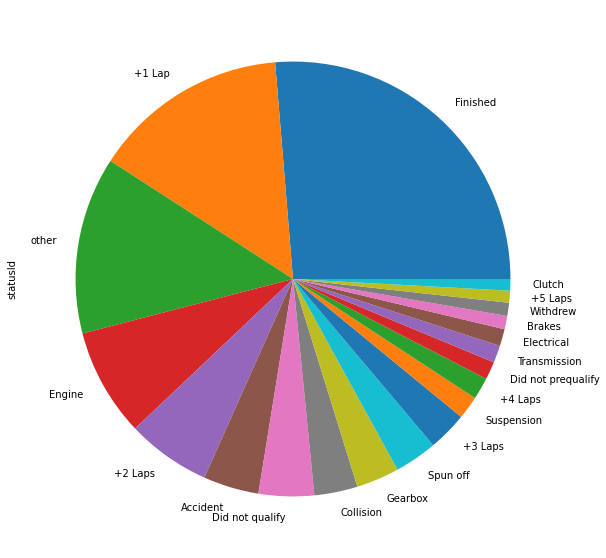

In [16]:
statusFrame = status.to_frame()


indexnames={}
for idx in statusFrame.index:
    name = statusDF.loc[statusDF["statusId"]==idx, "status"].iloc[0]
    indexnames[idx]=name
statusDef=statusFrame.rename(index=indexnames)

s=statusDef["statusId"]
otherS = s.groupby(np.where(s>=200,s.index,'other')).sum()#.plot.pie(figsize=(10, 10))
otherS=otherS.sort_values(ascending=False)
otherS.plot.pie(figsize=(10, 10))
display(otherS)

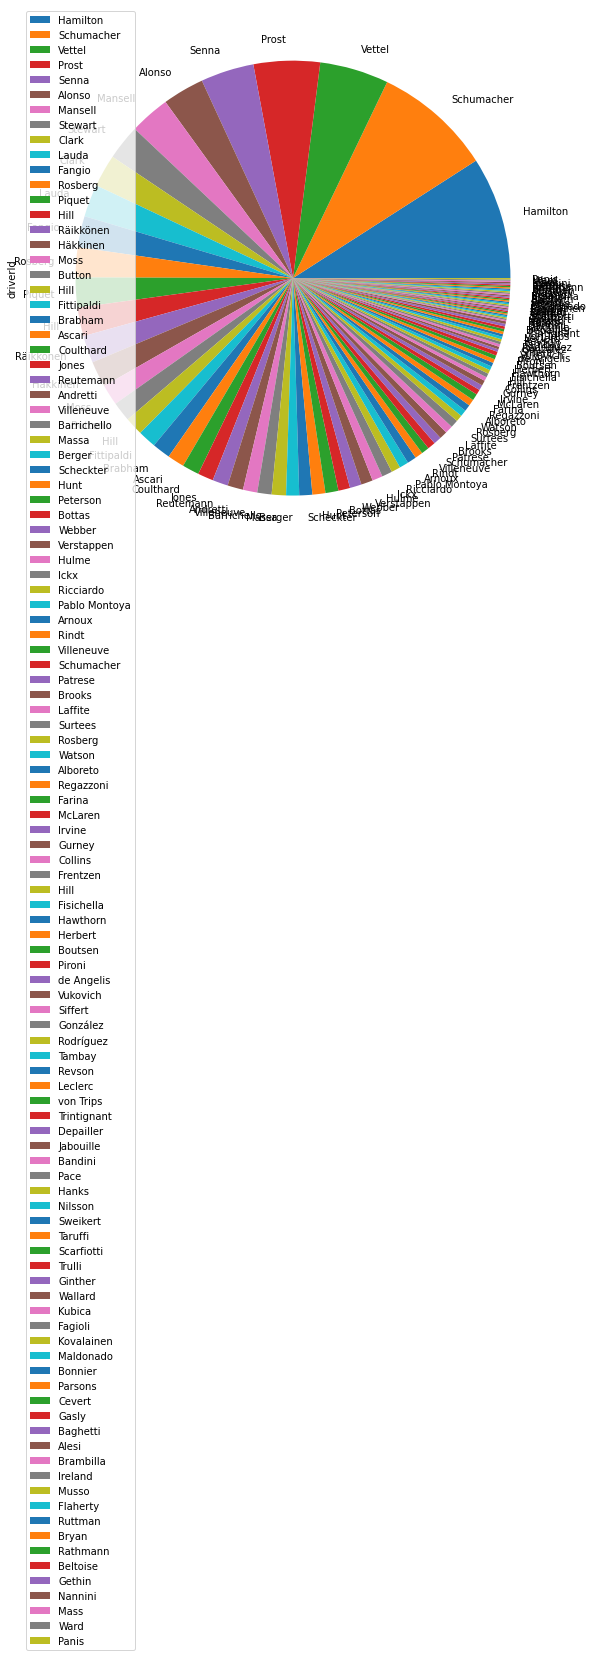

In [17]:
winResults = resultsDF[resultsDF['position'] == "1"]
winCount = winResults["driverId"].value_counts()
winCount = winCount.to_frame()
#display(winCount)

indexnames={}
for idx in winCount.index:
    name = driversDF.loc[driversDF["driverId"]==idx, "surname"].iloc[0]
    indexnames[idx]=name
winCountDef=winCount.rename(index=indexnames)

winCountDef.plot.pie(figsize=(10, 10), subplots=True);

{'monaco': 189, 'spa': 99, 'monza': 90, 'villeneuve': 86, 'nurburgring': 86, 'interlagos': 78, 'silverstone': 77, 'indianapolis': 69, 'albert_park': 61, 'hockenheimring': 59, 'osterreichring': 57, 'zandvoort': 52, 'suzuka': 47, 'hungaroring': 45, 'catalunya': 44, 'long_beach': 41}


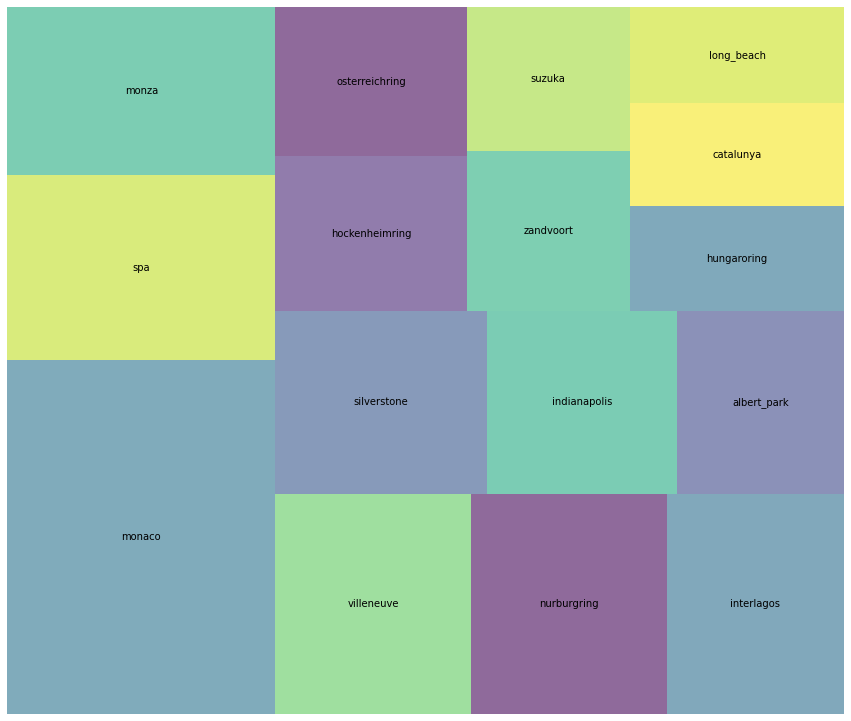

In [31]:
#ACCIDENTES POR CIRCUITO

accidentesDF = pd.merge(resultsDF, racesDF, how="inner", on=["raceId"]).drop(["circuitId_y"], axis = 1)
accidentesDF.rename({"circuitId_x" : "circuitId"}, axis = 1, inplace = True)
accidentesDF = pd.merge(accidentesDF, circuitsDF, how="left", on=["circuitId"])

accidentes = {}
nombres = []
for index, row in circuitsDF.iterrows():
    accidentes[row.circuitId] = 0
    nombres.append(row.circuitRef)

for index, row in resultsDF.iterrows():
    if int(row.statusId) in [3, 4]:
        accidentes[row.circuitId] += 1

res = {}



for idx in range(len(accidentes)):
    res[nombres[idx]] = accidentes[idx+1]
res = dict( sorted(res.items(), key=operator.itemgetter(1),reverse=True))


res = {key:val for key, val in res.items() if val > 40}
print(res)

volume = [*res.values()]
labels = [*res.keys()]

#print(volume)
#print(labels)

squarify.plot(sizes=volume, label=labels, alpha=0.6)

fig = plt.gcf()
plt.axis("off")
fig.set_size_inches(15, 13)
plt.show()


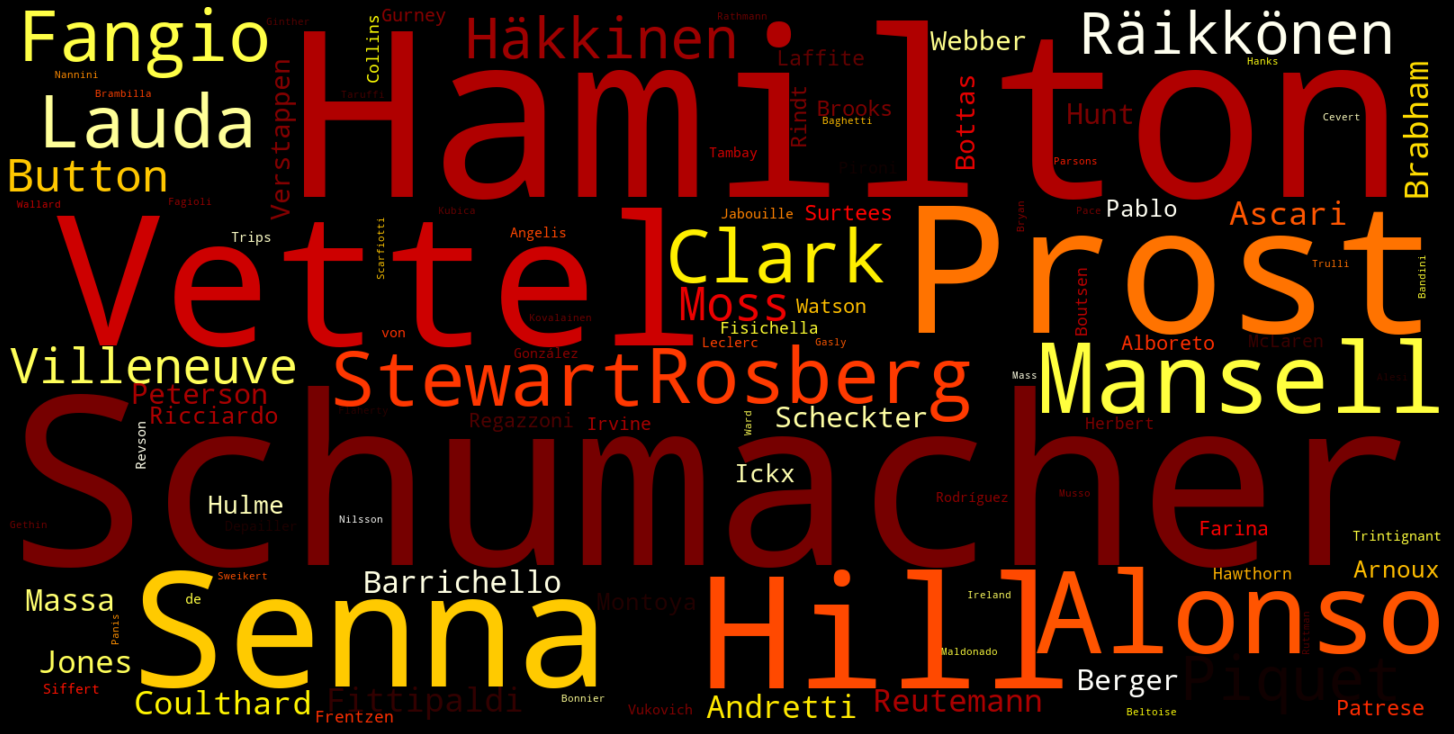

In [18]:
#winCountDef.index
wins = winResults['driverId'].tolist()
#str1 = ''.join(wins)

str2 = []

for idx in range(len(wins)):
    #print(str1[idx+1])
    #print(driversDF["driverId"]==int(str1[idx+1]))
    name = driversDF.loc[driversDF["driverId"]==int(wins[idx]), "surname"].iloc[0]
    str2.append(name)

str2=str(str2)
str2 = str2.replace(",", "")
str2 = str2.replace("'", "")
str2 = str2.replace(" ", "\n")

#print(str2)
wordcloud = WordCloud(width=1600, height=800, margin=0,collocations=False, colormap="hot").generate(str(str2))
"""plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()"""


plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('cloudword.png')
plt.show()



### Seasons

In [19]:
seasonsDF = pd.read_csv(path+seasonsPath+".csv")

print(seasonsDF.shape)
print("Total Seasons:", seasonsDF.shape[0])
pd.set_option("display.max_columns", None)
display(seasonsDF.head(5))
display(seasonsDF.tail(5))

(71, 2)
Total Seasons: 71


,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...


,year,url
66,2016,https://en.wikipedia.org/wiki/2016_Formula_One...
67,2017,https://en.wikipedia.org/wiki/2017_Formula_One...
68,2018,https://en.wikipedia.org/wiki/2018_Formula_One...
69,2019,https://en.wikipedia.org/wiki/2019_Formula_One...
70,2020,https://en.wikipedia.org/wiki/2020_Formula_One...


In [20]:
print("missing values:\n",seasonsDF.isna().sum())

missing values:
 year    0
url     0
dtype: int64


### Circuits

In [20]:
circuitsDF = pd.read_csv(path+circuitsPath+".csv")

print(circuitsDF.shape)
print("Total Circuits:", circuitsDF.shape[0])
pd.set_option("display.max_columns", None)
display(circuitsDF.head(6))
display(circuitsDF.tail(5))

(76, 9)
Total Circuits: 76


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,\N,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,\N,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,\N,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,\N,http://en.wikipedia.org/wiki/Istanbul_Park
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.42056,\N,http://en.wikipedia.org/wiki/Circuit_de_Monaco


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
71,72,port_imperial,Port Imperial Street Circuit,New Jersey,USA,40.7769,-74.0111,\N,http://en.wikipedia.org/wiki/Port_Imperial_Str...
72,73,BAK,Baku City Circuit,Baku,Azerbaijan,40.3725,49.8533,\N,http://en.wikipedia.org/wiki/Baku_City_Circuit
73,74,hanoi,Hanoi Street Circuit,Hanoi,Vietnam,21.0166,105.7660,\N,http://en.wikipedia.org/wiki/Hanoi_Street_Circuit
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.2270,-8.6267,\N,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.9975,11.3719,\N,http://en.wikipedia.org/wiki/Mugello_Circuit


In [22]:
print("missing values:\n",circuitsDF.isna().sum())

missing values:
 circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64


### Qualifying

In [23]:
qualifyingDF = pd.read_csv(path+qualifyingPath+".csv")

print(qualifyingDF.shape)
print("Total Qualifying:", qualifyingDF.shape[0])
pd.set_option("display.max_columns", None)
display(qualifyingDF.head(22))

(8634, 9)
Total Qualifying: 8634


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
5,6,18,15,7,11,6,1:26.427,1:26.101,1:28.527
6,7,18,3,3,7,7,1:26.295,1:26.059,1:28.687
7,8,18,14,9,9,8,1:26.381,1:26.063,1:29.041
8,9,18,10,7,12,9,1:26.919,1:26.164,1:29.593
9,10,18,20,5,15,10,1:26.702,1:25.842,\N


In [24]:
print("missing values:\n",qualifyingDF.isna().sum())

missing values:
 qualifyId          0
raceId             0
driverId           0
constructorId      0
number             0
position           0
q1                 8
q2               129
q3               245
dtype: int64


### Driver Standings

In [21]:
driverStandingsDF = pd.read_csv(path+driverStandingsPath+".csv")

print(driverStandingsDF.shape)
print("Total Driver Standings:", driverStandingsDF.shape[0])
pd.set_option("display.max_columns", None)
display(driverStandingsDF.head(8))

(32857, 7)
Total Driver Standings: 32857


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
5,6,18,6,3.0,6,6,0
6,7,18,7,2.0,7,7,0
7,8,18,8,1.0,8,8,0


In [26]:
print("missing values:\n",driverStandingsDF.isna().sum())

missing values:
 driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64


### Constructor Standings

In [27]:
constructorStandingsDF = pd.read_csv(path+constructorStandingsPath+".csv")

print(constructorStandingsDF.shape)
print("Total Constructor Standings:", constructorStandingsDF.shape[0])
pd.set_option("display.max_columns", None)
display(constructorStandingsDF.head(6))

(12456, 7)
Total Constructor Standings: 12456


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
5,6,18,6,1.0,6,6,0


In [28]:
print("missing values:\n",constructorStandingsDF.isna().sum())

missing values:
 constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64


### Constructor Results

In [29]:
constructorResultsDF = pd.read_csv(path+constructorResultsPath+".csv")

print(constructorResultsDF.shape)
print("Total Constructor Results:", constructorResultsDF.shape[0])
pd.set_option("display.max_columns", None)
display(constructorResultsDF.head(6))

(11700, 5)
Total Constructor Results: 11700


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
5,6,18,6,1.0,\N


In [30]:
print("missing values:\n",constructorResultsDF.isna().sum())

missing values:
 constructorResultsId    0
raceId                  0
constructorId           0
points                  0
status                  0
dtype: int64


In [31]:
print(constructorResultsDF.status.str.count("N").sum())

11683


In [32]:
pd.set_option("display.max_rows", None)
#constructorResultsDF.loc[:,"status"]


In [33]:
constructorResultsDF['status'].value_counts()

\N    11683
D        17
Name: status, dtype: int64

### Lap Times

In [38]:
lapTimesDF = pd.read_csv(path+lapTimesPath+".csv")

print(lapTimesDF.shape)
print("Total Lap Times:", lapTimesDF.shape[0])
pd.set_option("display.max_columns", None)
display(lapTimesDF.head(6))

(487314, 6)
Total Lap Times: 487314


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
5,841,20,6,1,1:32.605,92605


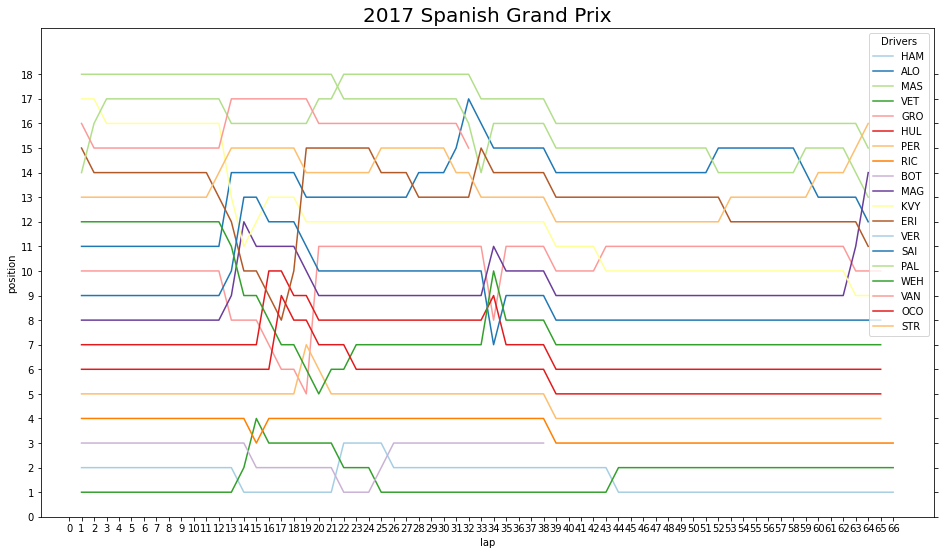

In [35]:
fig = plt.figure(figsize=(16,9))
_ = sns.lineplot(x="lap", y="position", hue="driverId", data=lapTimesDF[lapTimesDF["raceId"]==973], palette="Paired", legend="full")
_.set_yticks(range(19))
_.set_xticks(range(67))
_.yaxis.set_ticks_position("both")

driversNum=lapTimesDF[lapTimesDF["raceId"]==973]["driverId"].unique()
driversNum.sort()
names = []

for num in driversNum:
    names.append(driversDF.loc[driversDF["driverId"]==num, "code"].iloc[0])

#race{year;name}
race={}
race["year"]=racesDF.loc[racesDF["raceId"]==973, "year"].iloc[0]
race["name"]=racesDF.loc[racesDF["raceId"]==973, "name"].iloc[0]
plt.title(str(race["year"])+ " " + str(race["name"]), fontsize=20)
plt.legend(title="Drivers",loc='best',labels=names);

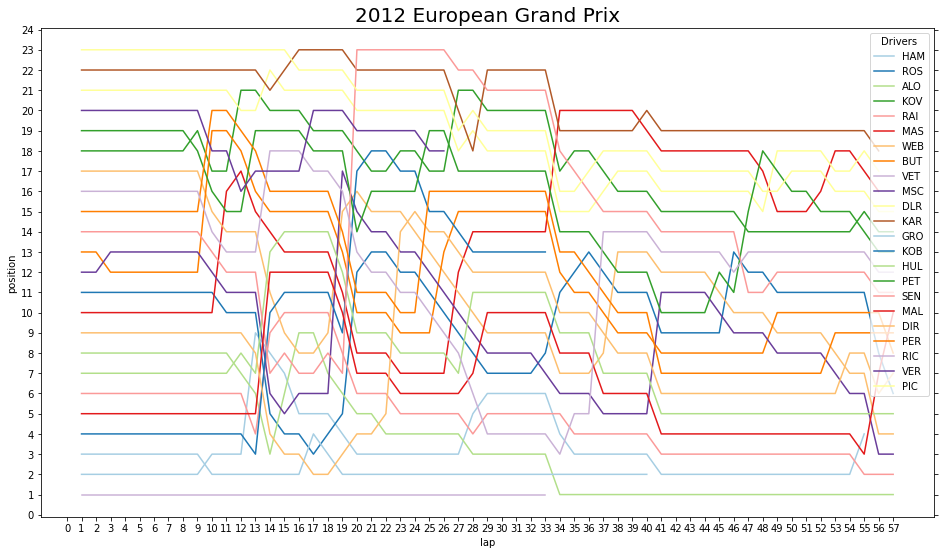

In [36]:
fig = plt.figure(figsize=(16,9))
"""valencia = lapTimesDF[lapTimesDF["raceId"]==867]
alonso = valencia[valencia["driverId"]==4]
display(alonso)
"""
_ = sns.lineplot(x="lap", y="position", hue="driverId", data=lapTimesDF[lapTimesDF["raceId"]==867], palette="Paired", legend="full")
_.set_yticks(range(25))
_.set_xticks(range(58))
_.yaxis.set_ticks_position("both")

driversNum=lapTimesDF[lapTimesDF["raceId"]==867]["driverId"].unique()
driversNum.sort()
names = []

for num in driversNum:
    names.append(driversDF.loc[driversDF["driverId"]==num, "code"].iloc[0])

#race{year;name}
race={}
race["year"]=racesDF.loc[racesDF["raceId"]==867, "year"].iloc[0]
race["name"]=racesDF.loc[racesDF["raceId"]==867, "name"].iloc[0]
plt.title(str(race["year"])+ " " + str(race["name"]), fontsize=20)
plt.legend(title="Drivers",loc='best',labels=names);

---

c:\users\thela\appdata\local\programs\python\python38\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\users\thela\appdata\local\programs\python\python38\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


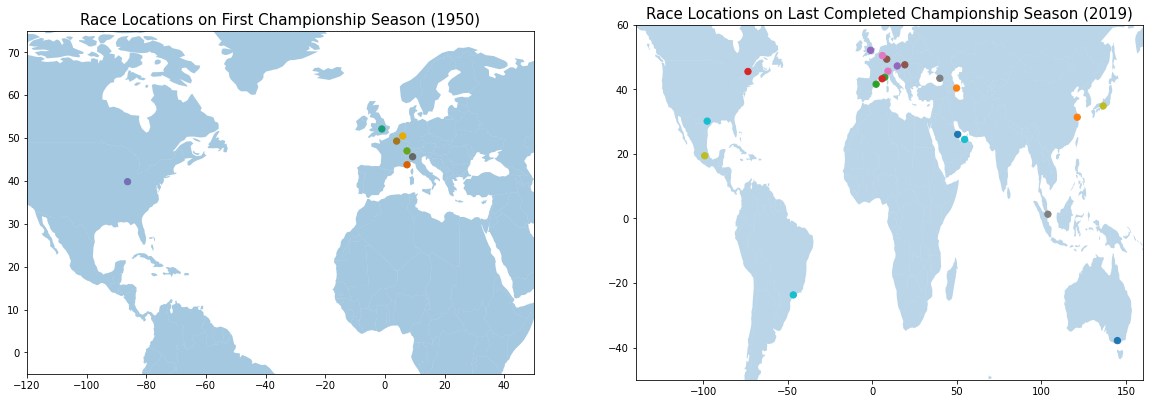

In [37]:
crs={"init":"epsg:4326"}
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
races=racesDF.loc[racesDF["year"]==1950]
races2019=racesDF.loc[racesDF["year"]==2019]
z=np.random.rand(100,100)

lat=[]
lon=[]

lat1=[]
lon1=[]


for race in races["circuitId"]:
    lat.append(circuitsDF.loc[circuitsDF["circuitId"]==race, "lat"].iloc[0])
    lon.append(circuitsDF.loc[circuitsDF["circuitId"]==race, "lng"].iloc[0])

races.insert(8,"lat", lat, True)
races.insert(9,"lng", lon, True)
#display(races)
points1950 = [Point(xy) for xy in zip( races["lng"], races["lat"] )]
geo1950 = gpd.GeoDataFrame(races, geometry=points1950, crs=crs)
#display(geo1950)


for race in races2019["circuitId"]:
    lat1.append(circuitsDF.loc[circuitsDF["circuitId"]==race, "lat"].iloc[0])
    lon1.append(circuitsDF.loc[circuitsDF["circuitId"]==race, "lng"].iloc[0])

races2019.insert(8,"lat", lat1, True)
races2019.insert(9,"lng", lon1, True)
points2019 = [Point(xy) for xy in zip( races2019["lng"], races2019["lat"] )]
geo2019 = gpd.GeoDataFrame(races2019, geometry=points2019, crs=crs)



fig,(ax1, ax2) = plt.subplots(ncols=2)

for ax in [ax1, ax2]:
    if ax == ax1:
        world.plot(ax=ax, alpha=0.4)
        geo1950.plot(ax=ax, markersize=40, marker="o",cmap='Dark2')
        ax.set_ylim([-5,75])
        ax.set_xlim([-120,50])
        ax.set_title("Race Locations on First Championship Season (1950)", fontsize=15)
    else:
        world.plot(ax=ax, alpha=0.3)
        geo2019.plot(ax=ax, markersize=40, marker="o", cmap="tab10")
        ax.set_ylim([-50,60])
        ax.set_xlim([-140,160])
        ax.set_title("Race Locations on Last Completed Championship Season (2019)", fontsize=15)

asp = np.diff(ax2.get_xlim())[0] / np.diff(ax2.get_ylim())[0]
ax2.set_aspect(asp*0.7)
fig.set_size_inches(20,8)


---

In [38]:
#importancia de la pole
perCircuits = {}
circuits = []
poleResults = resultsDF[resultsDF["grid"]==1]

for race in poleResults.raceId:
    circuit = racesDF.loc[racesDF["raceId"]==race, "circuitId"].iloc[0]
    circuits.append(circuit)

poleResults["circuitId"]=circuits

<ipython-input-38-af670e25d621>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poleResults["circuitId"]=circuits


<ipython-input-39-9b41d0ae9674>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poleResults["poleWin"]=delta


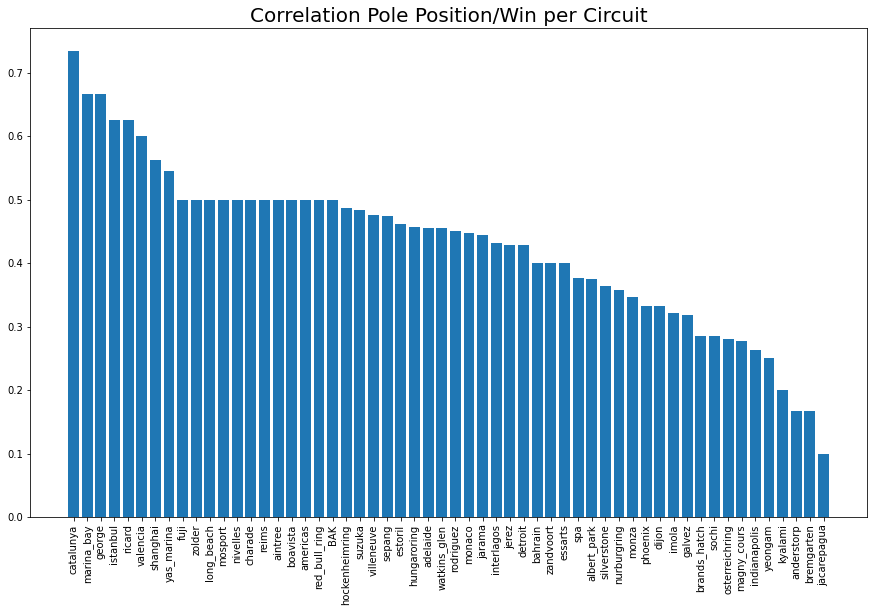

In [39]:
delta=[]
names={}

for index, row in poleResults.iterrows():
    delta.append(row.grid == row.positionOrder)

poleResults["poleWin"]=delta

#display(poleResults)


#print(poleResults.circuitId.unique())

for circuits in poleResults.circuitId.unique():
    counter=0
    perfect=0
    circuitResults = poleResults[poleResults["circuitId"]==circuits]
    for index, row in circuitResults.iterrows():
        if row.poleWin:
            perfect+=1
        counter+=1
    perCircuits[circuits]=perfect/counter


for key in perCircuits.keys():
    name = circuitsDF.loc[circuitsDF["circuitId"]==key,"circuitRef"].iloc[0]
    names[name]=perCircuits[key]


sortedNames = {}
sortedKeys = sorted(names, key=names.get, reverse=True)
for w in sortedKeys:
    sortedNames[w] = names[w]
    

sortedNames.pop("pedralbes")
sortedNames.pop("pescara")
sortedNames.pop("ain-diab")
sortedNames.pop("sebring")
sortedNames.pop("zeltweg")
sortedNames.pop("lemans")
sortedNames.pop("tremblant")
sortedNames.pop("montjuic")
sortedNames.pop("las_vegas")
sortedNames.pop("dallas")
sortedNames.pop("donington")
sortedNames.pop("okayama")
sortedNames.pop("riverside")
sortedNames.pop("avus")
sortedNames.pop("monsanto")
sortedNames.pop("buddh")
sortedNames.pop("mugello")
sortedNames.pop("portimao")
    

    

plt.figure(figsize=(15,9))
plt.bar(range(len(sortedNames)), list(sortedNames.values()), align="center")
plt.xticks(range(len(sortedNames)), list(sortedNames.keys()),rotation=90)
plt.title("Correlation Pole Position/Win per Circuit", fontsize=(20))


plt.show()





---

In [40]:
#guardado en ./data/weatherInfo.csv
"""from selenium import webdriver

weather = racesDF.iloc[:,[1,2,3]]
state = []

for link in racesDF.url:
    try:
        df = pd.read_html(link)[0]
        if "Weather" in list(df.iloc[:,0]):
            idx = list(df.iloc[:,0]).index("Weather")
            state.append(df.iloc[idx,1])
        else:
            df = pd.read_html(link)[1]
            if "Weather" in list(df.iloc[:,0]):
                idx = list(df.iloc[:,0]).index("Weather")
                state.append(df.iloc[idx,1])
            else:
                df = pd.read_html(link)[2]
                if "Weather" in list(df.iloc[:,0]):
                    idx = list(df.iloc[:,0]).index("Weather")
                    state.append(df.iloc[idx,1])
                else:
                    df = pd.read_html(link)[3]
                    if "Weather" in list(df.iloc[:,0]):
                        idx = list(df.iloc[:,0]).index("Weather")
                        state.append(df.iloc[idx,1])
                    else:
                        explorer = webdriver.Chrome()
                        explorer.get(link)
                        
                        lang = explorer.find_element_by_link_text("Italiano")
                        lang.click()
                        
                        itaWeather = explorer.find_element_by_xpath('//*[@id="mw-content-text"]/div/table[1]/tbody/tr[9]/td').text
                        state.append(itaWeather)
                    
                    
                    
    
    except:
        state.append("not found")
        
weather["weather"] = state

weatherDict = {'weather_warm': ['soleggiato', 'clear', 'warm', 'hot', 'sunny', 'fine', 'mild', 'sereno'],
               'weather_cold': ['cold', 'fresh', 'chilly', 'cool'],
               'weather_dry': ['dry', 'asciutto'],
               'weather_wet': ['showers', 'wet', 'rain', 'pioggia', 'damp', 'thunderstorms', 'rainy'],
               'weather_cloudy': ['overcast', 'nuvoloso', 'clouds', 'cloudy', 'grey', 'coperto']}

weatherDF = pd.DataFrame(columns = weatherDict.keys())
for col in weatherDF:
    weatherDF[col] = weather["weather"].map(lambda x: 1 if any(i in weatherDict[col] for i in x.lower().split()) else 0)
    
weatherInfo = pd.concat([weather, weatherDF], axis = 1)"""

weatherInfo = pd.read_csv("./data/weatherInfo.csv")
        

In [41]:
#display(weatherInfo)
weatherInfo.to_csv("./data/weatherInfo.csv", index=False)

---

In [42]:
df1 = pd.merge(racesDF, weatherInfo, how="inner", on=["year", "round", "circuitId"]).drop(["weather", "time", "url"], axis=1)
#df1
df1.head()

,raceId,year,round,circuitId,name,date,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,0,0,1,1,0
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,0,0,0,1,0
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,1,0,0,0,0
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,1,0,0,0,0


In [43]:
resultsDriversDF = pd.merge(resultsDF,driversDF,how="left", on=["driverId"]).drop(["code", "forename", "surname", "url", "number_y", "number_x"], axis=1)
resultsDriversDF.head()

,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,fastestLapMill,driverRef,dob,nationality
0,1,18,1,1,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,87452.0,hamilton,1985-01-07,British
1,2,18,2,2,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,2008,1,1,87739.0,heidfeld,1977-05-10,German
2,3,18,3,3,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,2008,1,1,88090.0,rosberg,1985-06-27,German
3,4,18,4,4,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,2008,1,1,88603.0,alonso,1981-07-29,Spanish
4,5,18,5,1,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,2008,1,1,87418.0,kovalainen,1981-10-19,Finnish


In [44]:
df2 = pd.merge(df1, resultsDriversDF, how="inner", on=["year", "round", "circuitId", "raceId"]).drop(["points", "statusId", "position", "positionText", "time", "rank", "fastestLapSpeed", "laps"], axis=1)
print(df2.shape)
df2.head()

(24900, 23)


,raceId,year,round,circuitId,name,date,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,resultId,driverId,constructorId,grid,positionOrder,milliseconds,fastestLap,fastestLapTime,fastestLapMill,driverRef,dob,nationality
0,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7554,18,23,1,1,5655784,17,1:28.020,88020.0,button,1980-01-19,British
1,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7555,22,23,2,2,5656591,43,1:29.066,89066.0,barrichello,1972-05-23,Brazilian
2,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7556,15,7,20,3,5657388,50,1:28.916,88916.0,trulli,1974-07-13,Italian
3,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7557,10,7,19,4,5660219,53,1:28.416,88416.0,glock,1982-03-18,German
4,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7558,4,4,10,5,5660663,53,1:28.712,88712.0,alonso,1981-07-29,Spanish


In [45]:
driverStandingsDF.rename(columns={"position":"driverStandingPosition", "positionText":"driverStandingPositionText"}, inplace=True)
df3 = pd.merge(df2, driverStandingsDF, how="left", on=["raceId","driverId"]).drop(["driverStandingsId", "driverStandingPositionText","fastestLapTime","fastestLap"], axis=1)
df3.head()

,raceId,year,round,circuitId,name,date,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,resultId,driverId,constructorId,grid,positionOrder,milliseconds,fastestLapMill,driverRef,dob,nationality,points,driverStandingPosition,wins
0,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7554,18,23,1,1,5655784,88020.0,button,1980-01-19,British,10.0,1.0,1.0
1,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7555,22,23,2,2,5656591,89066.0,barrichello,1972-05-23,Brazilian,8.0,2.0,0.0
2,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7556,15,7,20,3,5657388,88916.0,trulli,1974-07-13,Italian,6.0,3.0,0.0
3,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7557,10,7,19,4,5660219,88416.0,glock,1982-03-18,German,5.0,4.0,0.0
4,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7558,4,4,10,5,5660663,88712.0,alonso,1981-07-29,Spanish,4.0,5.0,0.0


In [46]:
constructors = []
for constructor in df3.constructorId:
    constructors.append(constructorsDF.loc[constructorsDF["constructorId"]==constructor, "constructorRef"].iloc[0])
df3["constructor"] = constructors
df3 = df3.drop(["constructorId"], axis=1)
df3.head()

,raceId,year,round,circuitId,name,date,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,resultId,driverId,grid,positionOrder,milliseconds,fastestLapMill,driverRef,dob,nationality,points,driverStandingPosition,wins,constructor
0,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7554,18,1,1,5655784,88020.0,button,1980-01-19,British,10.0,1.0,1.0,brawn
1,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7555,22,2,2,5656591,89066.0,barrichello,1972-05-23,Brazilian,8.0,2.0,0.0,brawn
2,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7556,15,20,3,5657388,88916.0,trulli,1974-07-13,Italian,6.0,3.0,0.0,toyota
3,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7557,10,19,4,5660219,88416.0,glock,1982-03-18,German,5.0,4.0,0.0,toyota
4,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7558,4,10,5,5660663,88712.0,alonso,1981-07-29,Spanish,4.0,5.0,0.0,renault


In [47]:
constructorStandingsFinalDF = constructorStandingsDF

years = []
rounds = []
constructors = []
for ids in constructorStandingsFinalDF.raceId:
    years.append(racesDF.loc[racesDF["raceId"]==ids, "year"].iloc[0])
    rounds.append(racesDF.loc[racesDF["raceId"]==ids, "round"].iloc[0])
for ids in constructorStandingsFinalDF.constructorId:
    constructors.append(constructorsDF.loc[constructorsDF["constructorId"]==ids, "constructorRef"].iloc[0])
    
constructorStandingsFinalDF["year"] = years
constructorStandingsFinalDF["round"] = rounds
constructorStandingsFinalDF["constructor"] = constructors

constructorStandingsFinalDF = constructorStandingsFinalDF.drop(["constructorStandingsId", "raceId", "constructorId", "positionText"], axis = 1)
constructorStandingsFinalDF = constructorStandingsFinalDF.rename(columns={"points": "constructorPoints", "wins": "constructorWins", "position":"constructorPosition"})

constructorStandingsFinalDF.head()

,constructorPoints,constructorPosition,constructorWins,year,round,constructor
0,14.0,1,1,2008,1,mclaren
1,8.0,3,0,2008,1,bmw_sauber
2,9.0,2,0,2008,1,williams
3,5.0,4,0,2008,1,renault
4,2.0,5,0,2008,1,toro_rosso


In [48]:
df4 = pd.merge(df3, constructorStandingsFinalDF, how="left", on=["year", "round", "constructor"])
print(df4.shape)

df4.grid = df4.grid.replace({0: 99})

df4.head()

(24900, 27)


,raceId,year,round,circuitId,name,date,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,resultId,driverId,grid,positionOrder,milliseconds,fastestLapMill,driverRef,dob,nationality,points,driverStandingPosition,wins,constructor,constructorPoints,constructorPosition,constructorWins
0,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7554,18,1,1,5655784,88020.0,button,1980-01-19,British,10.0,1.0,1.0,brawn,18.0,1.0,1.0
1,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7555,22,2,2,5656591,89066.0,barrichello,1972-05-23,Brazilian,8.0,2.0,0.0,brawn,18.0,1.0,1.0
2,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7556,15,20,3,5657388,88916.0,trulli,1974-07-13,Italian,6.0,3.0,0.0,toyota,11.0,2.0,0.0
3,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7557,10,19,4,5660219,88416.0,glock,1982-03-18,German,5.0,4.0,0.0,toyota,11.0,2.0,0.0
4,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7558,4,10,5,5660663,88712.0,alonso,1981-07-29,Spanish,4.0,5.0,0.0,renault,4.0,3.0,0.0


In [49]:
qualyTime = []
for index, row in qualifyingDF.iterrows():
    if row.q3 != str(r"\N"):
        qualyTime.append(row.q3)
    else:
        if row.q2 != str(r"\N"):
            qualyTime.append(row.q2)
        else:
            if row.q1 != str(r"\N"):
                qualyTime.append(row.q1)
            else:
                qualyTime.append(0)
qualifyingFinalDF = qualifyingDF
qualifyingFinalDF["qualyTime"] = qualyTime
qualifyingFinalDF=qualifyingFinalDF.drop(["q1", "q2", "q3", "number", "qualifyId"], axis=1)
qualifyingFinalDF = qualifyingFinalDF.rename(columns={"position":"grid"})

rounds = []
years = []
for race in qualifyingFinalDF.raceId:
    rounds.append(racesDF.loc[racesDF["raceId"]==race, "round"].iloc[0])
    years.append(racesDF.loc[racesDF["raceId"]==race, "year"].iloc[0])
    

qualifyingFinalDF = qualifyingFinalDF.drop(["raceId"], axis=1)
qualifyingFinalDF["year"] = years
qualifyingFinalDF["round"] = rounds
print(qualifyingDF.shape)
print(qualifyingFinalDF.shape)
qualifyingFinalDF.head()

(8634, 10)
(8634, 6)


,driverId,constructorId,grid,qualyTime,year,round
0,1,1,1,1:26.714,2008,1
1,9,2,2,1:26.869,2008,1
2,5,1,3,1:27.079,2008,1
3,13,6,4,1:27.178,2008,1
4,2,2,5,1:27.236,2008,1


In [50]:
df4.tail()

,raceId,year,round,circuitId,name,date,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,resultId,driverId,grid,positionOrder,milliseconds,fastestLapMill,driverRef,dob,nationality,points,driverStandingPosition,wins,constructor,constructorPoints,constructorPosition,constructorWins
24895,1044,2020,14,5,Turkish Grand Prix,2020-11-15,0,0,0,1,0,24901,847,99,16,\N,100814.0,russell,1998-02-15,British,0.0,21.0,0.0,williams,0.0,10.0,0.0
24896,1044,2020,14,5,Turkish Grand Prix,2020-11-15,0,0,0,1,0,24902,825,13,17,\N,100948.0,kevin_magnussen,1992-10-05,Danish,1.0,19.0,0.0,haas,3.0,9.0,0.0
24897,1044,2020,14,5,Turkish Grand Prix,2020-11-15,0,0,0,1,0,24903,154,17,18,\N,103281.0,grosjean,1986-04-17,French,2.0,18.0,0.0,haas,3.0,9.0,0.0
24898,1044,2020,14,5,Turkish Grand Prix,2020-11-15,0,0,0,1,0,24904,849,99,19,\N,103495.0,latifi,1995-06-29,Canadian,0.0,20.0,0.0,williams,0.0,10.0,0.0
24899,1044,2020,14,5,Turkish Grand Prix,2020-11-15,0,0,0,1,0,24905,841,10,20,\N,111122.0,giovinazzi,1993-12-14,Italian,4.0,17.0,0.0,alfa,8.0,8.0,0.0


In [51]:
finalDF = pd.merge(df4, qualifyingFinalDF, how="left", on=["year", "round", "driverId"]).drop(["constructorId", "grid_y"], axis=1)
#IMPORTANTE, HAY 2 GRIDS AL HACER EL MERGE, Y SON LAS POSICIONES "RAW" DE LA CLASIFICACION DEL SABADO, MIENTRAS QUE EL X ES EL RESULTADO DE LAS CLASIFICACIONES+PENALIZACIONES
finalDF = finalDF.rename(columns={"grid_x":"grid"})
print(finalDF.shape)
finalDF.head()

(24900, 28)


,raceId,year,round,circuitId,name,date,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,resultId,driverId,grid,positionOrder,milliseconds,fastestLapMill,driverRef,dob,nationality,points,driverStandingPosition,wins,constructor,constructorPoints,constructorPosition,constructorWins,qualyTime
0,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7554,18,1,1,5655784,88020.0,button,1980-01-19,British,10.0,1.0,1.0,brawn,18.0,1.0,1.0,1:26.202
1,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7555,22,2,2,5656591,89066.0,barrichello,1972-05-23,Brazilian,8.0,2.0,0.0,brawn,18.0,1.0,1.0,1:26.505
2,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7556,15,20,3,5657388,88916.0,trulli,1974-07-13,Italian,6.0,3.0,0.0,toyota,11.0,2.0,0.0,1:27.127
3,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7557,10,19,4,5660219,88416.0,glock,1982-03-18,German,5.0,4.0,0.0,toyota,11.0,2.0,0.0,1:26.975
4,1,2009,1,1,Australian Grand Prix,2009-03-29,1,0,0,0,0,7558,4,10,5,5660663,88712.0,alonso,1981-07-29,Spanish,4.0,5.0,0.0,renault,4.0,3.0,0.0,1:25.605


In [52]:
minValue = finalDF['year'].min()
maxValue = finalDF['year'].max()
print(minValue)
print(maxValue)

1950
2020


In [53]:
print("missing values:\n",finalDF.isna().sum())

missing values:
 raceId                        0
year                          0
round                         0
circuitId                     0
name                          0
date                          0
weather_warm                  0
weather_cold                  0
weather_dry                   0
weather_wet                   0
weather_cloudy                0
resultId                      0
driverId                      0
grid                          0
positionOrder                 0
milliseconds                  0
fastestLapMill                0
driverRef                     0
dob                           0
nationality                   0
points                      481
driverStandingPosition      481
wins                        481
constructor                   0
constructorPoints          1875
constructorPosition        1875
constructorWins            1875
qualyTime                 16511
dtype: int64


In [54]:
#age on every race for drivers
finalDF["date"] = pd.to_datetime(finalDF.date)
finalDF["dob"] = pd.to_datetime(finalDF.dob)
finalDF["driverAge"] = finalDF.apply(lambda x: relativedelta(x["date"],x["dob"]).years, axis=1)
finalDF.drop(["date", "dob"], axis=1, inplace=True)

In [55]:
print("Antes de la conversión:", finalDF.shape)



for col in ["points", "driverStandingPosition", "wins", "constructorPoints", "constructorPosition", "constructorWins"]:
    finalDF[col].fillna(0, inplace = True)
    finalDF[col] = finalDF[col].map(lambda x: int(x))
    
finalDF["qualyTime"] = finalDF["qualyTime"].fillna(value=0)
finalDF.loc[(finalDF.qualyTime == 0), "qualyTime"] = "4:59.999"
finalDF.loc[(finalDF.milliseconds == r"\N"), "milliseconds"] = 99999999
    
finalDF.dropna(inplace = True)
print("Despues de la conversion:", finalDF.shape)

Antes de la conversión: (24900, 27)
Despues de la conversion: (24900, 27)


In [56]:
print("missing values:\n",finalDF.isna().sum().sum())

missing values:
 0


In [57]:
#qualyDiff
finalDF["qualyTime"] = finalDF.qualyTime.map(lambda x: 0 if str(x) == "00.000" else(float(str(x).split(":")[1]) + (60 * float(str(x).split(":")[0])) if x!= 0 else 0))
finalDF = finalDF[finalDF["qualyTime"] != 0]
finalDF.sort_values(["year", "round", "grid"], inplace = True)
finalDF["qualyDiff"] = finalDF.groupby(["year", "round"]).qualyTime.diff()
finalDF["qualyTime"] = finalDF.groupby(["year", "round"]).qualyDiff.cumsum().fillna(0)
finalDF.drop("qualyDiff", axis=1, inplace=True)

In [58]:
finalDF.tail()

,raceId,year,round,circuitId,name,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,resultId,driverId,grid,positionOrder,milliseconds,fastestLapMill,driverRef,nationality,points,driverStandingPosition,wins,constructor,constructorPoints,constructorPosition,constructorWins,qualyTime,driverAge
24891,1044,2020,14,5,Turkish Grand Prix,0,0,0,1,0,24897,826,16,12,99999999,101019.0,kvyat,Russian,26,14,0,alphatauri,89,7,1,21.305,26
24897,1044,2020,14,5,Turkish Grand Prix,0,0,0,1,0,24903,154,17,18,99999999,103281.0,grosjean,French,2,18,0,haas,3,9,0,25.144,34
24892,1044,2020,14,5,Turkish Grand Prix,0,0,0,1,0,24898,842,19,13,99999999,99586.0,gasly,French,63,10,0,alphatauri,89,7,1,10.791,24
24895,1044,2020,14,5,Turkish Grand Prix,0,0,0,1,0,24901,847,99,16,99999999,100814.0,russell,British,0,21,0,williams,0,10,0,22.252,22
24898,1044,2020,14,5,Turkish Grand Prix,0,0,0,1,0,24904,849,99,19,99999999,103495.0,latifi,Canadian,0,20,0,williams,0,10,0,33.846,25


In [59]:
freq = finalDF["grid"].value_counts() 
print(freq)

99    1586
7     1043
1     1043
11    1040
4     1039
5     1039
9     1039
10    1038
3     1037
8     1037
13    1034
12    1034
2     1033
6     1032
14    1028
15    1021
16    1007
17     996
18     959
19     946
20     916
21     697
22     656
23     453
24     429
25     301
26     248
27      46
28      30
29      25
30      19
31      18
32      17
33      13
34       1
Name: grid, dtype: int64


In [60]:
#quitamos todas las filas de turkish gp porque no tienen los datos de wins bien definidos
finalDF.drop(finalDF.tail(20).index,inplace=True) # drop last n rows
#finalDF.tail()

In [61]:
del finalDF['circuitId']
del finalDF['raceId']
del finalDF['resultId']
del finalDF['milliseconds'] #???
del finalDF["driverId"]
finalDF.tail()

,year,round,name,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,grid,positionOrder,fastestLapMill,driverRef,nationality,points,driverStandingPosition,wins,constructor,constructorPoints,constructorPosition,constructorWins,qualyTime,driverAge
24873,2020,13,Emilia Romagna Grand Prix,0,0,0,0,1,16,14,78822.0,grosjean,French,2,18,0,haas,3,9,0,2.309,34
24877,2020,13,Emilia Romagna Grand Prix,0,0,0,0,1,17,18,79273.0,kevin_magnussen,Danish,1,19,0,haas,3,9,0,2.330,28
24868,2020,13,Emilia Romagna Grand Prix,0,0,0,0,1,18,9,78088.0,raikkonen,Finnish,4,16,0,alfa,8,8,0,2.344,41
24870,2020,13,Emilia Romagna Grand Prix,0,0,0,0,1,19,11,78719.0,latifi,Canadian,0,20,0,williams,0,10,0,2.378,25
24869,2020,13,Emilia Romagna Grand Prix,0,0,0,0,1,20,10,78794.0,giovinazzi,Italian,4,17,0,alfa,8,8,0,2.599,26


In [62]:
#convertir a dummies -> strings a atributos y 0/1
# name -> circuit name
dummies = pd.get_dummies(finalDF, columns = ["name", "nationality", "constructor"])

indexNames = dummies[dummies["year"] < 1989].index
dummies.drop(indexNames, inplace=True)

for col in dummies.columns:
    if "name" in col and dummies[col].sum() < 60:
        dummies.drop(col, axis=1, inplace=True)
    elif "nationality" in col and dummies[col].sum() < 60:
        dummies.drop(col, axis=1, inplace=True)
    elif "constructor" in col and dummies[col].sum() < 80:
        dummies.drop(col, axis=1, inplace=True)
    else:
        pass

In [63]:
indexNames = dummies[dummies["year"] < 1989].index
dummies.drop(indexNames, inplace=True)

In [64]:
#dummies['milliseconds']=dummies.milliseconds.astype('int64')

In [65]:
dummies.to_csv("./data/finalDF.csv", index=False)

---

In [76]:
from sklearn.metrics import confusion_matrix, precision_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from xgboost import XGBRegressor, XGBClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
import json

In [67]:
f1DF = pd.read_csv("./data/finalDF.csv")

In [68]:
#regression
predictingYear = 2019


regressionDF = f1DF.copy()
scaler = StandardScaler()

trainSet = regressionDF[regressionDF.year != int(predictingYear)]
xTrain = trainSet.drop(["driverRef", "positionOrder"], axis=1)
yTrain = trainSet.positionOrder

xTrain = pd.DataFrame(scaler.fit_transform(xTrain), columns = xTrain.columns)

In [69]:
comparison_dict = {"model":[], "params":[], "score":[]}

In [70]:
#scoring functions
def scoreRegression(model, predictYear, model_params):
    score = 0
    driversList = []
    fullPredictionDF = pd.DataFrame(columns=["results","driver","positionOrder","real","predicted"])
    
    for race in f1DF[f1DF.year == int(predictYear)]["round"].unique():
        
        #train/test
        
        testDF = f1DF[(f1DF.year == int(predictYear)) & (f1DF["round"] == race)]
        driversList = f1DF[(f1DF.year == int(predictYear)) & (f1DF["round"] == race)]["driverRef"].tolist()
        xTest = testDF.drop(["driverRef", "positionOrder"], axis=1)
        yTest = testDF.positionOrder
        
        #scaler
        xTest = pd.DataFrame(scaler.transform(xTest), columns = xTest.columns)
        
        #predictions
        predictionDF = pd.DataFrame(model.predict(xTest), columns = ["results"])
        predictionDF["driver"] = driversList
        predictionDF["positionOrder"] = yTest.reset_index(drop=True)
        predictionDF["real"] = predictionDF.positionOrder.map(lambda x: 1 if x == 1 else 0)
        predictionDF.sort_values("results", ascending = True, inplace = True)
        predictionDF.reset_index(inplace = True, drop = True)
        predictionDF["predicted"] = predictionDF.index
        predictionDF["predicted"] = predictionDF.predicted.map(lambda x:1 if x== 0 else 0)
        
        
        score += precision_score(predictionDF.real, predictionDF.predicted)
        
        
        
        fullPredictionDF = fullPredictionDF.append(predictionDF, ignore_index=True)
        
        
        
    totalScore = score / f1DF[f1DF.year == int(predictYear)]["round"].unique().max()
    fullPredictionDF.to_csv(f"./predictions/{model_params}.csv", index=False)
    
    return totalScore
        
    
    

In [72]:
#linear regression

params={"fit_intercept" : ["True", "False"]}
counter = 1

for fit_intercept in params["fit_intercept"]:
    model_params = (fit_intercept)
    model = LinearRegression(fit_intercept = fit_intercept)
    model.fit(xTrain, yTrain)
    
    #print(model.score(xTrain, yTrain))
    
    string_params = ("linear_regression-" + str(fit_intercept))
    
    modelScore = scoreRegression(model, predictingYear, string_params)
    
    comparison_dict["model"].append("linear_regression")
    comparison_dict["params"].append(model_params)
    comparison_dict["score"].append(modelScore)
    print(f"============{counter}/2============")
    counter += 1

============1/2============
============2/2============


In [73]:
## random forest regressor
#n_estimators, max_features, max_depth
params={"max_features": ["auto", 0.5, None],
        "n_estimators": [50, 100, 500],
        "max_depth": [5, 10, 20]}

counter = 1

for feature in params["max_features"]:
    for estimator in params["n_estimators"]:
        for depth in params["max_depth"]:
            model_params = (feature, estimator, depth)
            model = RandomForestRegressor(criterion = "mse", max_features = feature, n_estimators=estimator, max_depth=depth, random_state=42)
            model.fit(xTrain, yTrain)
            
            
            string_params = ("randomforest-"+str(feature), str(estimator), str(depth))
            modelScore = scoreRegression(model, predictingYear, string_params)
            
            comparison_dict["model"].append("random_forest_regressor")
            comparison_dict["params"].append(model_params)
            comparison_dict["score"].append(modelScore)
            
            print(f"============{counter}/27============")
            counter += 1


============1/27============
============2/27============
============3/27============
============4/27============
============5/27============
============6/27============
============7/27============
============8/27============
============9/27============
============10/27============
============11/27============
============12/27============
============13/27============
============14/27============
============15/27============
============16/27============
============17/27============
============18/27============
============19/27============
============20/27============
============21/27============
============22/27============
============23/27============
============24/27============
============25/27============
============26/27============
============27/27============


In [74]:
#svm regressor

params={"gamma": [0.1, 0.6],
        "C": [2, 5, 15],
        "kernel": ["linear", "poly", "rbf"]}
counter = 1
for gamma in params["gamma"]:
    for c in params["C"]:
        for kernel in params["kernel"]:
            model_params = (gamma, c, kernel)
            model = svm.SVR(gamma = gamma, C = c, kernel = kernel)
            model.fit(xTrain, yTrain)
            
            string_params = ("svm-" + str(gamma), str(c), str(kernel))
            modelScore = scoreRegression(model, predictingYear, string_params)
            
            comparison_dict["model"].append("SVMRegressor")
            comparison_dict["params"].append(model_params)
            comparison_dict["score"].append(modelScore)
            
            print(f"============{counter}/18============")
            counter += 1
            

============1/18============
============2/18============
============3/18============


KeyboardInterrupt: 

In [ ]:
#introduccion a una NN

params={"hidden_layer_sizes": [(60, 15, 35, 5), (80, 30, 45, 5), (60,25,50,20,5)],
       "activation": ["relu", "identity", "logistic", "tanh"],
       "solver": ["adam", "lbfgs", "sgd"],
       "alpha": [0.0001, 0.001, 0.01, 0.1]}

counter = 1

for layers in params["hidden_layer_sizes"]:
    for activation in params["activation"]:
        for solver in params["solver"]:
            for alpha in params["alpha"]:

                model_params = (layers, activation, solver, alpha)
                model = MLPRegressor(hidden_layer_sizes=layers, activation=activation, solver=solver,
                                    alpha=alpha, max_iter=1000, random_state=9)

                model.fit(xTrain, yTrain)

                string_params = ("NNReg-"+ str(layers), str(activation), str(solver), str(alpha))
                modelScore = scoreRegression(model, predictingYear, string_params)

                comparison_dict["model"].append("NNRegressor")
                comparison_dict["params"].append(model_params)
                comparison_dict["score"].append(modelScore)
                
                print(f"============{counter}/144============")
                counter += 1

In [68]:
#CLASSIFICATION

predictingYear = 2019
classificationDF = f1DF.copy()
classificationDF.positionOrder = classificationDF.positionOrder.map(lambda x: 1 if x == 1 else 0)



trainSet = classificationDF[classificationDF.year != int(predictingYear)]
xTrain = trainSet.drop(["driverRef", "positionOrder"], axis=1)
yTrain = trainSet.positionOrder

scaler = StandardScaler()

xTrain = pd.DataFrame(scaler.fit_transform(xTrain), columns = xTrain.columns)

In [79]:
def scoreClassification(model, predictYear, model_params):
    score = 0
    driversList = []
    fullPredictionDF = pd.DataFrame(columns=["driver","positionOrder", "prob1", "prob0","real","predicted"])
    
    for race in classificationDF[classificationDF.year == int(predictYear)]["round"].unique():
        
        #train/test
        testDF = classificationDF[(classificationDF.year == int(predictYear)) & (classificationDF["round"]==race)]
        driversList = classificationDF[(classificationDF.year == int(predictYear)) & (classificationDF["round"] == race)]["driverRef"].to_list()
        xTest = testDF.drop(["driverRef", "positionOrder"], axis=1)
        yTest = testDF.positionOrder
        
        #scaler
        xTest = pd.DataFrame(scaler.transform(xTest), columns = xTest.columns)
        
        #predictions
        predictionDF = pd.DataFrame(model.predict_proba(xTest), columns = ["prob0", "prob1"])
        predictionDF["driver"] = driversList
        predictionDF["real"] = yTest.reset_index(drop=True)
        predictionDF.sort_values("prob1", ascending = False, inplace = True)
        predictionDF.reset_index(inplace = True, drop = True)
        predictionDF["predicted"] = predictionDF.index
        predictionDF["predicted"] = predictionDF.predicted.map(lambda x:1 if x==0 else 0)
        
        score += precision_score(predictionDF.real, predictionDF.predicted)
        
        fullPredictionDF = fullPredictionDF.append(predictionDF, ignore_index=True)
        

    
    totalScore = score / f1DF[f1DF.year == int(predictYear)]["round"].unique().max()
    fullPredictionDF.to_csv(f"./predictions/Classification{model_params}.csv", index=False)
    
    return totalScore

AUC of ROC Curve: 1.0


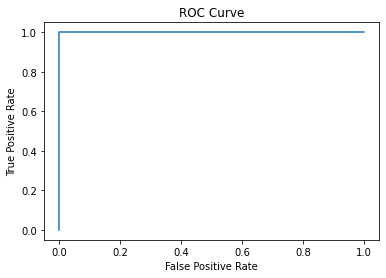

AUC of ROC Curve: 1.0


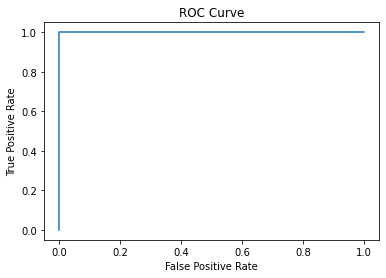

AUC of ROC Curve: 1.0


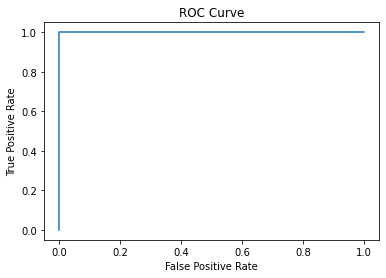

AUC of ROC Curve: 1.0


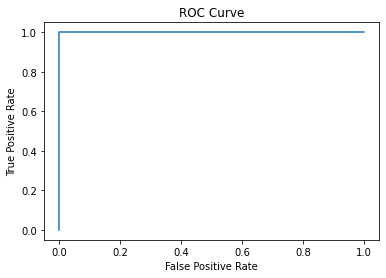

AUC of ROC Curve: 1.0


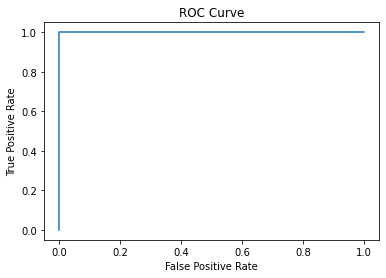

AUC of ROC Curve: 1.0


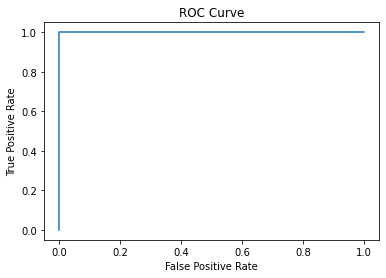

AUC of ROC Curve: 1.0


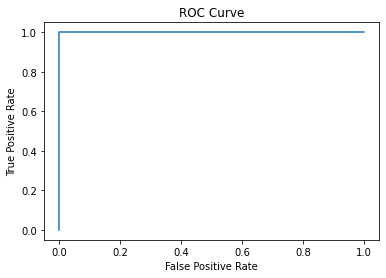

AUC of ROC Curve: 1.0


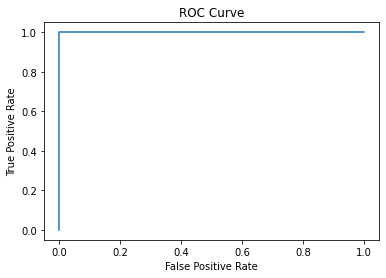

AUC of ROC Curve: 0.9473684210526316


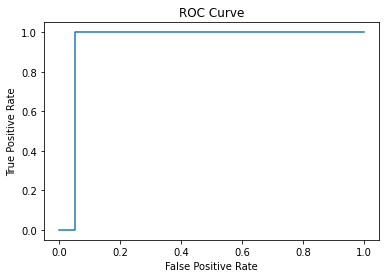

AUC of ROC Curve: 1.0


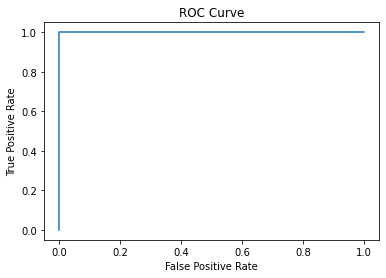

AUC of ROC Curve: 0.9473684210526316


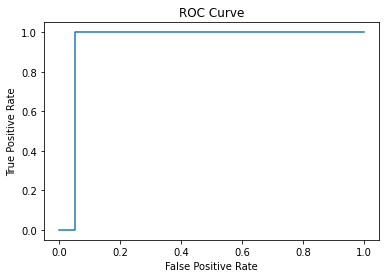

AUC of ROC Curve: 1.0


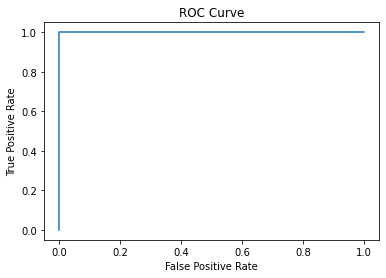

AUC of ROC Curve: 0.8421052631578947


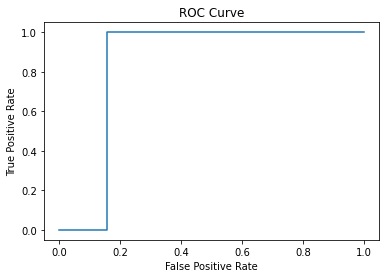

AUC of ROC Curve: 0.9473684210526316


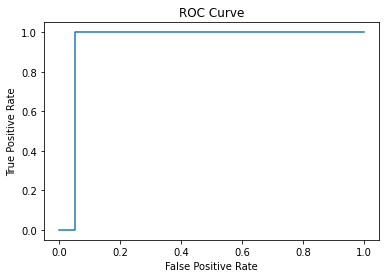

AUC of ROC Curve: 0.7894736842105263


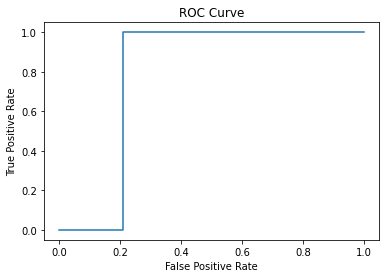

AUC of ROC Curve: 1.0


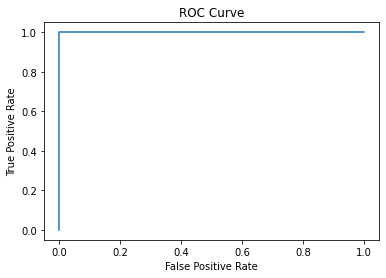

AUC of ROC Curve: 0.9473684210526316


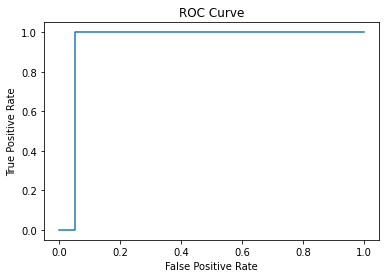

AUC of ROC Curve: 1.0


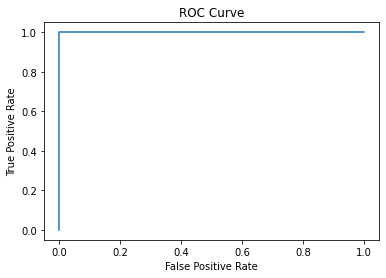

AUC of ROC Curve: 0.9473684210526316


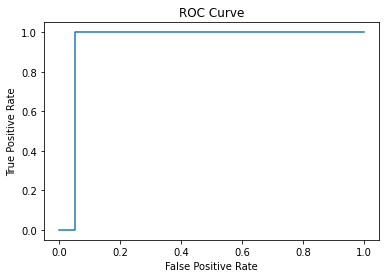

AUC of ROC Curve: 0.9473684210526316


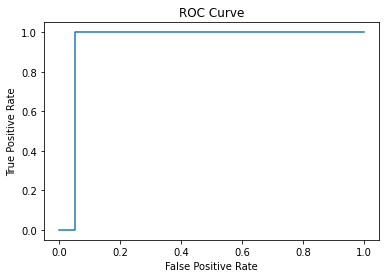

AUC of ROC Curve: 1.0


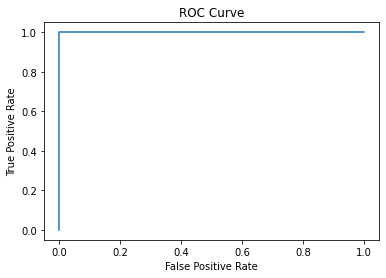

NameError: name 'comparison_dict' is not defined

In [78]:
#logistic regression

params = {"penalty": ["l1", "l2"],
         "solver": ["liblinear", "saga"],
         "C": [0.1, 0.5]}
counter = 1
for penalty in params["penalty"]:
    for solver in params["solver"]:
        for c in params["C"]:
            model_params = (penalty, solver, c)
            model = LogisticRegression(penalty=penalty, solver=solver, C=c, max_iter=10000)
            model.fit(xTrain, yTrain)
            
            string_params = ("logregression-"+str(penalty),str(solver),str(c))
            modelScore = scoreClassification(model, predictingYear, string_params)
            
            comparison_dict["model"].append("logistic_regression")
            comparison_dict["params"].append(model_params)
            comparison_dict["score"].append(modelScore)
            
            print(f"============{counter}/8============")
            counter += 1
            
            

In [ ]:
#randomforest classifier

params={"criterion": ["gini", "entropy"],
       "max_features": ["auto", 0.5, None],
       "max_depth": [5, 10, 20]}
counter = 1

for criterion in params["criterion"]:
    for feature in params["max_features"]:
        for depth in params["max_depth"]:
            model_params = (criterion, feature, depth)
            model = RandomForestClassifier(criterion=criterion, max_features=feature, max_depth=depth)
            model.fit(xTrain, yTrain)
            
            string_params = ("randomforest-"+str(criterion),str(feature),str(depth))
            modelScore = scoreClassification(model, predictingYear, string_params)
            
            comparison_dict["model"].append("random_forest_classifier")
            comparison_dict["params"].append(model_params)
            comparison_dict["score"].append(modelScore)
            print(f"============{counter}/18============")
            counter += 1
            

In [ ]:
#svm classifier

params={"gamma": [0.1, 0.6],
       "C": [2, 5, 15],
       "kernel":["linear", "poly", "rbf"]}
counter = 1
for gamma in params["gamma"]:
    for c in params["C"]:
        for kernel in params["kernel"]:
            model_params = (gamma, c, kernel)
            model = svm.SVC(gamma = gamma, C = c, kernel = kernel, probability = True)
            model.fit(xTrain, yTrain)
            
            string_params = ("svm-"+str(gamma), str(c), str(kernel))
            modelScore = scoreClassification(model, predictingYear, string_params)
            
            comparison_dict["model"].append("SVMClassifier")
            comparison_dict["params"].append(model_params)
            comparison_dict["score"].append(modelScore)
            
            print(f"============{counter}/18============")
            counter += 1

In [ ]:
#nn classifier
params={"hidden_layer_sizes": [(30, 20, 5), (60, 15, 35, 5), (80, 30, 45, 5), (60,25,50,20,5)],
       "activation": ["relu", "identity", "logistic", "tanh"],
       "solver": ["adam", "lbfgs", "sgd"],
       "alpha": [0.0001, 0.001, 0.01, 0.1]}

counter = 1

for layers in params["hidden_layer_sizes"]:
    for activation in params["activation"]:
        for solver in params["solver"]:
            for alpha in params["alpha"]:

                model_params = (layers, activation, solver, alpha)
                model = MLPClassifier(hidden_layer_sizes=layers, activation=activation, solver=solver,
                                    alpha=alpha, max_iter=1000, random_state=9)

                model.fit(xTrain, yTrain)

                string_params = ("NNReg-"+ str(layers), str(activation), str(solver), str(alpha))
                modelScore = scoreClassification(model, predictingYear, string_params)

                comparison_dict["model"].append("NNClassifier")
                comparison_dict["params"].append(model_params)
                comparison_dict["score"].append(modelScore)
                
                print(f"============{counter}/192============")
                counter += 1


In [ ]:
finalModelResults = pd.DataFrame(comparison_dict)
display(finalModelResults)
finalModelResults[finalModelResults['score']==finalModelResults['score'].max()]


In [ ]:
json = json.dumps(comparison_dict)
f = open("comparison_dict.json","w")
f.write(json)
f.close()

In [ ]:
"""finalModelResults = pd.DataFrame(comparison_dict).groupby("model")["score"].max()
finalModelResults = finalModelResults.to_frame()"""

pd.DataFrame(comparison_dict).groupby("model")["score"].max()


    

In [ ]:
display(finalModelResults)

In [ ]:
"""with open('comparison_dict.json') as json_file: 
    comparison_dict = json.load(json_file) """
#finalModelResults[finalModelResults['score']==finalModelResults['score'].max()]

In [ ]:
model = RandomForestRegressor()
model.fit(xTrain, yTrain)
importance = model.feature_importances_

In [ ]:
features = xTrain.columns
indices = np.argsort(importance)

num_features = 10

plt.figure(figsize=(10,20))
plt.title("Feature Importance")

plt.barh(range(num_features), importance[indices[-num_features:]], color="b", align="center")
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel("Relative Importance")
plt.show()

---

In [42]:
racesDF.loc[racesDF['year'] == 2012]

,raceId,year,round,circuitId,name,date,time,url
858,860,2012,1,1,Australian Grand Prix,2012-03-18,06:00:00,http://en.wikipedia.org/wiki/2012_Australian_G...
859,861,2012,2,2,Malaysian Grand Prix,2012-03-25,08:00:00,http://en.wikipedia.org/wiki/2012_Malaysian_Gr...
860,862,2012,3,17,Chinese Grand Prix,2012-04-15,07:00:00,http://en.wikipedia.org/wiki/2012_Chinese_Gran...
861,863,2012,4,3,Bahrain Grand Prix,2012-04-22,12:00:00,http://en.wikipedia.org/wiki/2012_Bahrain_Gran...
862,864,2012,5,4,Spanish Grand Prix,2012-05-13,12:00:00,http://en.wikipedia.org/wiki/2012_Spanish_Gran...
863,865,2012,6,6,Monaco Grand Prix,2012-05-27,12:00:00,http://en.wikipedia.org/wiki/2012_Monaco_Grand...
864,866,2012,7,7,Canadian Grand Prix,2012-06-10,18:00:00,http://en.wikipedia.org/wiki/2012_Canadian_Gra...
865,867,2012,8,12,European Grand Prix,2012-06-24,12:00:00,http://en.wikipedia.org/wiki/2012_European_Gra...
866,868,2012,9,9,British Grand Prix,2012-07-08,12:00:00,http://en.wikipedia.org/wiki/2012_British_Gran...
867,869,2012,10,10,German Grand Prix,2012-07-22,12:00:00,http://en.wikipedia.org/wiki/2012_German_Grand...


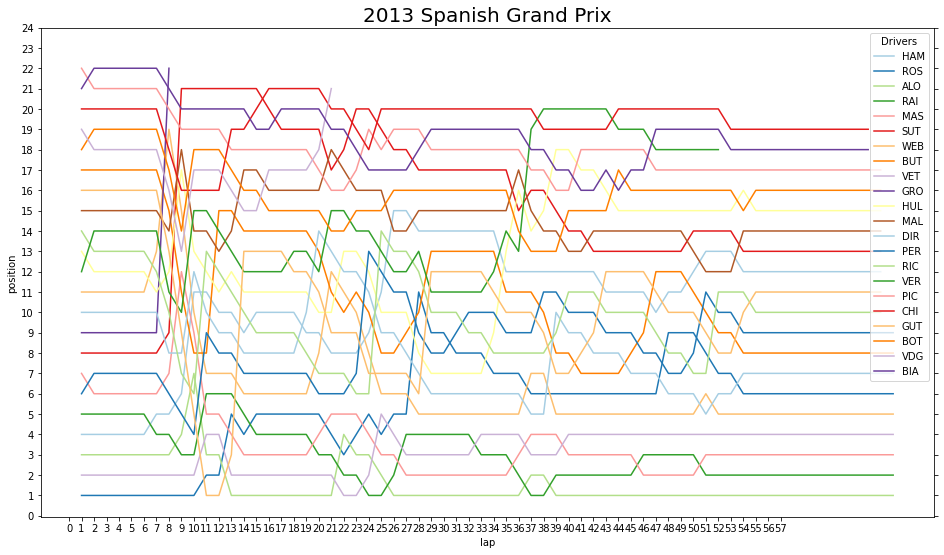

In [41]:
fig = plt.figure(figsize=(16,9))

_ = sns.lineplot(x="lap", y="position", hue="driverId", data=lapTimesDF[lapTimesDF["raceId"]==884], palette="Paired", legend="full")
_.set_yticks(range(25))
_.set_xticks(range(58))
_.yaxis.set_ticks_position("both")

driversNum=lapTimesDF[lapTimesDF["raceId"]==884]["driverId"].unique()
driversNum.sort()
names = []

for num in driversNum:
    names.append(driversDF.loc[driversDF["driverId"]==num, "code"].iloc[0])

#race{year;name}
race={}
race["year"]=racesDF.loc[racesDF["raceId"]==884, "year"].iloc[0]
race["name"]=racesDF.loc[racesDF["raceId"]==884, "name"].iloc[0]
plt.title(str(race["year"])+ " " + str(race["name"]), fontsize=20)
plt.legend(title="Drivers",loc='best',labels=names);